#Simulation de solutions d'EDS


Exercice1:

$dX_t = X_tdB_t,  X0 = 1$


Limite de $X_t$ quand t tend vers $∞$ avec la solution exacte qui s'écrit sous la forme suivante:
$X_t = X_0 exp(B_t − t/2)$

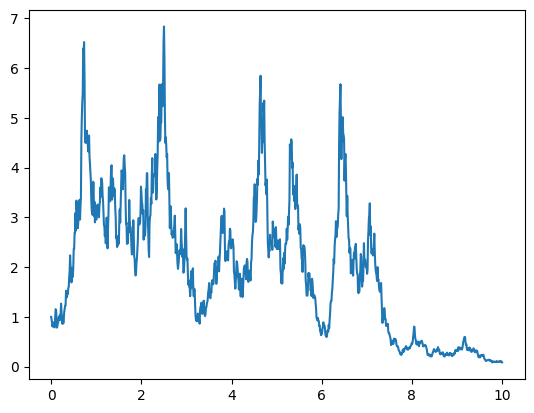

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Plus T est grand plus la convergence est marquée
T=10

n=1000 #A changer si on veut discrétiser plus
T=np.linspace(0,T,n)
X0=1
B=[0]
L=[X0]

#Le vecteur du mouvement Brownien est obtenu on approximant les incrément qui suivent une loi normale
for i in range(1,len(T)):
  dt=T[i]-T[i-1]
  b=B[i-1]+np.random.normal(0,np.sqrt(dt))
  B.append(b)
  #La valeur discrétisée est approchée par la valeur du Mouvement Brownien précédemment défini
  x=X0*np.exp(b-T[i]/2)
  L.append(x)

plt.plot(T,L)




Dans cette question on implémente **le Schéma d'Euler** dans un premier temps:





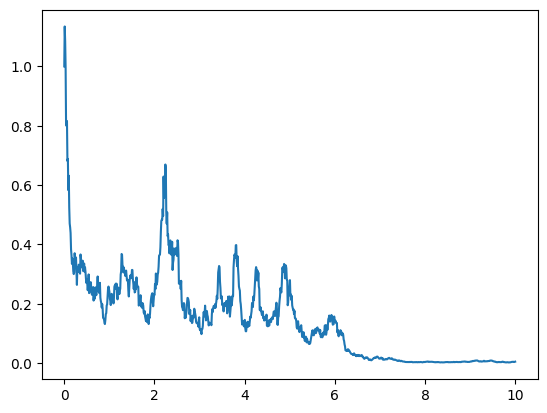

In [ ]:
n=1000
def simulate_euler_sde(n, T, x0):


    X_n_values = [x0]

    for i in range(1,len(T)):  #A vérifier !!
        dt=T[i]-T[i-1]
        dW = np.random.normal(0, np.sqrt(dt))
        x0=x0+ x0*dW
        X_n_values.append(x0)

    return X_n_values

X_E=simulate_euler_sde(n,T,X0)
plt.plot(T,X_E)

On remarque que la solution approchée tend vers 0 aussi.

On implémente ensuite **le schéma de Milstein.**



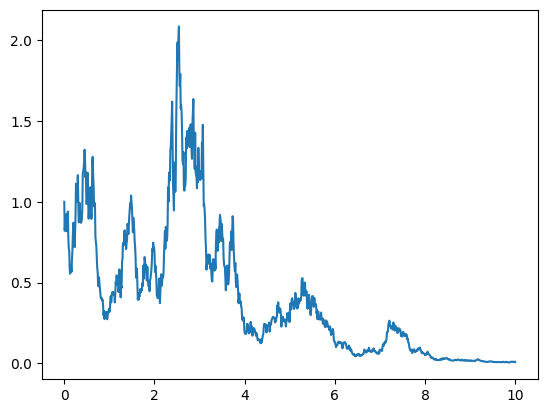

In [ ]:
def simulate_Milstein_sde(n, T, x0):


    X_n_values = [x0]

    for i in range(1,len(T)):  #A vérifier !!
        dt=T[i]-T[i-1]
        dW = np.random.normal(0, np.sqrt(dt))
        x0=x0*(1-dt/2 + dW + (dW**2)/2)
        X_n_values.append(x0)

    return X_n_values

X_M= simulate_Milstein_sde(n,T,X0)

plt.plot(T,X_M)

Le schéma d'Euleur est d'une convergence de l'ordre de $O(h)$

Ainsi on essaie de simuler l'erreur pour différentes valeurs de h, c'est à dire pour différent N et on essaie de trouver une erreur linéaire en h




In [ ]:
Val_N=[10,20,40,60,80,100,140,160,200,400,600,100]

for i in Val_N:
  T=np.linspace(0,1,i)

